**<font color=black size=4>Import Library Packages</font>**

In [1]:
# Disable warnings
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Import Common Library Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Machine Learning Library Packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
# from sklearn.feature_selection import RFECV
# from sklearn.model_selection import cross_val_score, StratifiedKFold

# Other setups
%matplotlib inline
sns.set(font_scale=1.5)
plt.style.use(style='ggplot')

**<font color=black size=4>Load dataset</font>**

In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# Dataset preprocessing
df_data = df_train.append(df_test)  # combine training set and testing set
df_data.reset_index(inplace=True, drop=True)  # reset dataset index

In [4]:
df_data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


**<font color=black size=4>Overview of dataset</font>**  
+ **Age**, **Cabin**,and **Embarked** have missing values

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**<font color=black size=4>Variables analysis</font>**

**<font color=black size=3>1. Survival rate vs Sex</font>**  
+ Male: 0.189  
+ Female: 0.742
+ Overall: 0.384
+ Interpretation: Let female escape first

**<font color=black size=3>Data analysis</font>**

,Survival_rate
female,0.742
male,0.189
all,0.384


Text(0, 0.5, 'Count')

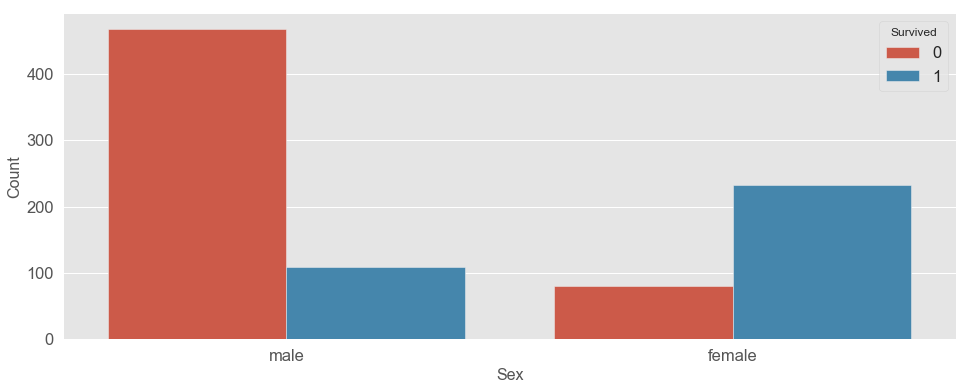

In [9]:
# Data processing
all_suvrate = round(df_train['Survived'].mean(), 3)  # cal. total survival rate
df_all_suvrate = pd.DataFrame(all_suvrate, columns=['Survival_rate'], index=['all'])  # put total survival rate into dataframe
df_sex_vs_suvrate = df_train[['Sex', 'Survived']].groupby(['Sex']).mean().round(3)  # cal. survival rate on sex
df_sex_vs_suvrate.columns = ['Survival_rate']  # rename column
display(df_sex_vs_suvrate.append(df_all_suvrate))

# Plotting
plt.figure(figsize = (16,6))  # enlarge figure size
s = sns.countplot(df_train['Sex'], hue=df_train['Survived'])
s.set_xlabel('Sex',fontsize=16)
s.set_ylabel('Count',fontsize=16)

In [10]:
#  Label encoding
df_data['Sex_Code'] = df_data['Sex'].map({'female' : 1, 'male' : 0}) # do labelencode on sex

# Dataset observation
cols = ['Name', 'Sex', 'Sex_Code']
df_data.loc[:, cols]

,Name,Sex,Sex_Code
0,"Braund, Mr. Owen Harris",male,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1
2,"Heikkinen, Miss. Laina",female,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1
4,"Allen, Mr. William Henry",male,0
5,"Moran, Mr. James",male,0
6,"McCarthy, Mr. Timothy J",male,0
7,"Palsson, Master. Gosta Leonard",male,0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,1
9,"Nasser, Mrs. Nicholas (Adele Achem)",female,1


**<font color=black size=3>The contribution of variable Sex(X1) on Survived(Y)</font>**

In [11]:
# Data slicing
df_train = df_data[:len(df_train)]
df_test = df_data[len(df_train):]

# Training features selection
X = df_train['Sex_Code'].to_frame()  # transform series into dataframe
Y = df_train['Survived']

# Model training
model_1 = RandomForestClassifier(random_state=0, n_estimators=250, min_samples_split=20, oob_score=True)
model_1.fit(X, Y)
print('Out-Of-Bag(oob) score : %.5f' %(model_1.oob_score_))

Out-Of-Bag(oob) score : 0.78676


**<font color=black size=3>Export to CSV</font>**

In [12]:
# Training features selection
X = df_test['Sex_Code'].to_frame()  # transform series into dataframe

# Predict by model
model_1_prediction = model_1.predict(X)
submit1 = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': model_1_prediction.astype(int)})
submit1.to_csv("Model_1.csv", index=False)

**<font color=black size=3>2. Survival rate vs Cabin class</font>**  
+ Class_1: 0.630  
+ Class_2: 0.473  
+ Class_3: 0.242  
+ Overall: 0.384
+ Interpretation: The rich have higher survival rate

**<font color=black size=3>Data analysis</font>**

,Survival_rate
1,0.630
2,0.473
3,0.242
all,0.384


Text(0, 0.5, 'Count')

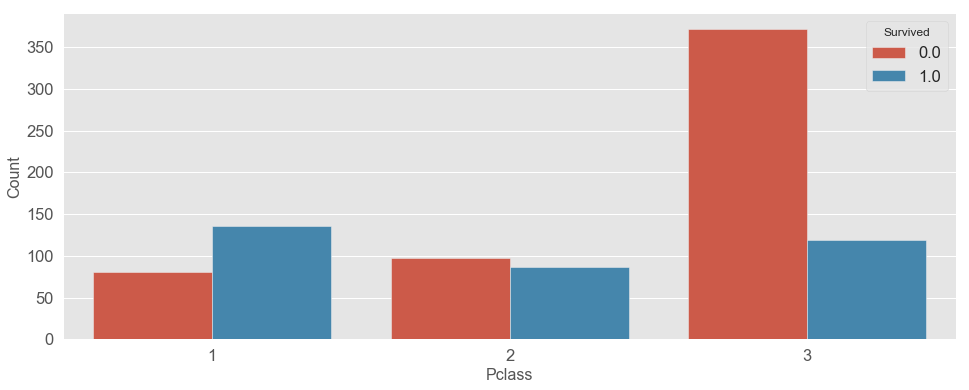

In [13]:
# Data processing
df_pclass_vs_suvrate = df_train[['Pclass', 'Survived']].groupby(['Pclass']).mean().round(3)  # cal. survival rate on cabin class
df_pclass_vs_suvrate.columns = ['Survival_rate']  # rename column
display(df_pclass_vs_suvrate.append(df_all_suvrate))

# Plotting
plt.figure(figsize = (16,6))  # enlarge figure size
s = sns.countplot(df_train['Pclass'], hue=df_train['Survived'])
s.set_xlabel('Pclass',fontsize=16)
s.set_ylabel('Count',fontsize=16)

**<font color=black size=3>The contribution of variable Pclass(X) on Survived(Y)</font>**

In [14]:
# Data slicing
df_train = df_data[:len(df_train)]
df_test = df_data[len(df_train):]

# Training features selection
X = df_train['Pclass'].to_frame()  # transform series into dataframe
Y = df_train['Survived']

# Model training
model_test = RandomForestClassifier(random_state=0, n_estimators=250, min_samples_split=20, oob_score=True)
model_test.fit(X, Y)
print('Out-Of-Bag(oob) score : %.5f' %(model_test.oob_score_))

Out-Of-Bag(oob) score : 0.67901


**<font color=black size=3>The contribution of variable Sex(X1), Pclass(X2) on Survived(Y)</font>**

In [15]:
# Training features selection
X = df_train[['Sex_Code', 'Pclass']]
Y = df_train['Survived']

# Model training
model_2 = RandomForestClassifier(random_state=0, n_estimators=250, min_samples_split=20, oob_score=True)
model_2.fit(X, Y)
print('Out-Of-Bag(oob) score : %.5f' %(model_2.oob_score_))

Out-Of-Bag(oob) score : 0.73737


**<font color=black size=3>Export to CSV</font>**

In [16]:
# Training features selection
X = df_test[['Sex_Code', 'Pclass']]

# Predict by model
model_2_prediction = model_2.predict(X)
submit2 = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': model_2_prediction.astype(int)})
submit2.to_csv("Model_2.csv", index=False)

**<font color=black size=3>3. Survival rate vs Fare</font>**  

**<font color=black size=3>Data analysis</font>**
+ Interpretation: The rich have higher survival rate

,Age,Name,Sex,Ticket,Pclass,Embarked,Fare,Log_Fare
0,22.0,"Braund, Mr. Owen Harris",male,A/5 21171,3,S,7.2500,0.860338
1,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,1,C,71.2833,1.852988
2,26.0,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,3,S,7.9250,0.898999


Text(0, 0.5, 'Survived')

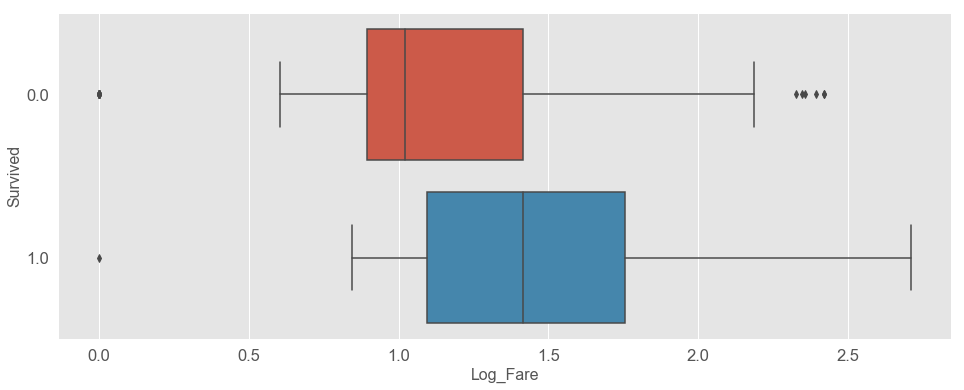

In [17]:
# Data processing
df_train['Log_Fare'] = df_train['Fare'].map(lambda x : np.log10(x) if x > 0 else 0)  # take log on Fare and name this new variable as Log_Fare

# Dataset observation
cols = ['Age', 'Name', 'Sex', 'Ticket', 'Pclass', 'Embarked', 'Fare', 'Log_Fare']
display(df_train.loc[:, cols].head(3))

# Plotting
plt.figure(figsize = (16,6))  # enlarge figure size
s = sns.boxplot(y='Survived', x='Log_Fare', data=df_train, orient='h')
s.set_xlabel('Log_Fare',fontsize=16)
s.set_ylabel('Survived',fontsize=16)

In [18]:
# Data preprocessing
df_data['Fare'] = df_data['Fare'].fillna(df_data['Fare'].median())  # filling missing values
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Sex_Code       1309 non-null int64
dtypes: float64(3), int64(5), object(5)
memory usage: 133.0+ KB


Pclass,1,2,3
Fare_1int_Code,,,
0,323,277,709


C:\Users\haha\Anaconda3\envs\ML\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Pclass,1,2,3
Fare_2int_Code,,,
0,8,134,516
1,315,143,193


C:\Users\haha\Anaconda3\envs\ML\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Pclass,1,2,3
Fare_3int_Code,,,
0,8,6,440
1,14,211,204
2,301,60,65


C:\Users\haha\Anaconda3\envs\ML\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Pclass,1,2,3
Fare_4int_Code,,,
0,8,6,323
1,0,128,193
2,77,104,147
3,238,39,46


C:\Users\haha\Anaconda3\envs\ML\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Pclass,1,2,3
Fare_5int_Code,,,
0,8,6,261
1,0,36,218
2,0,124,132
3,95,99,71
4,220,12,27


C:\Users\haha\Anaconda3\envs\ML\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Pclass,1,2,3
Fare_6int_Code,,,
0,8,6,222
1,0,0,218
2,0,128,76
3,14,83,128
4,118,48,46
5,183,12,19


C:\Users\haha\Anaconda3\envs\ML\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Pclass,1,2,3
Fare_7int_Code,,,
0,8,6,196
1,0,0,211
2,0,55,86
3,0,89,98
4,52,81,53
5,100,34,54
6,163,12,11


C:\Users\haha\Anaconda3\envs\ML\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Pclass,1,2,3
Fare_8int_Code,,,
0,8,6,196
1,0,0,127
2,0,1,153
3,0,127,40
4,0,41,123
5,77,63,24
6,89,32,46
7,149,7,0


C:\Users\haha\Anaconda3\envs\ML\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Pclass,1,2,3
Fare_9int_Code,,,
0,8,6,138
1,0,0,185
2,0,0,117
3,0,114,53
4,0,27,81
5,14,70,70
6,74,30,31
7,82,30,34
8,145,0,0


C:\Users\haha\Anaconda3\envs\ML\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Pclass,1,2,3
Fare_10int_Code,,,
0,8,6,117
1,0,0,144
2,0,0,146
3,0,36,72
4,0,92,37
5,0,32,95
6,41,57,33
7,54,42,38
8,89,12,27


C:\Users\haha\Anaconda3\envs\ML\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


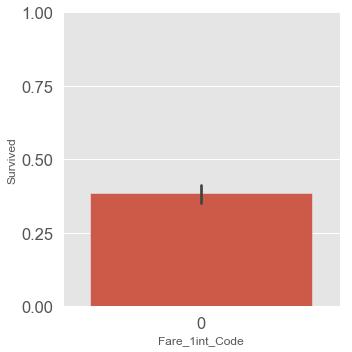

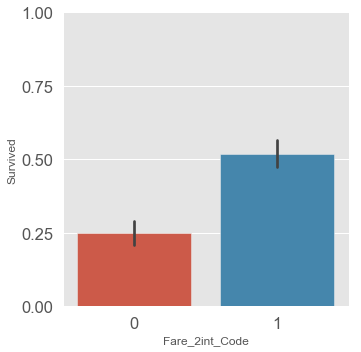

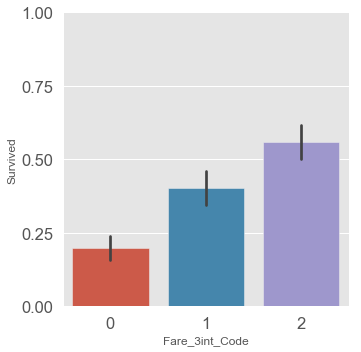

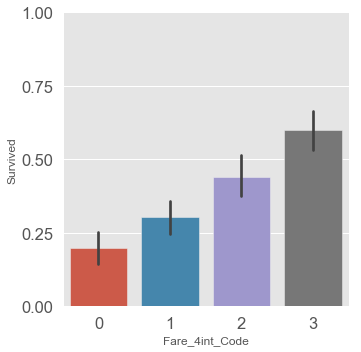

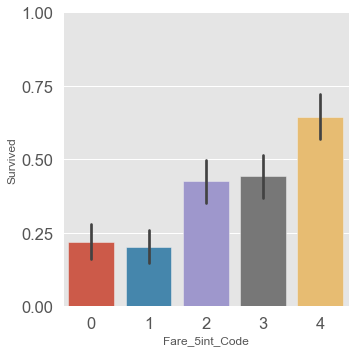

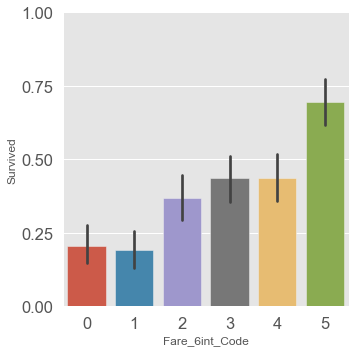

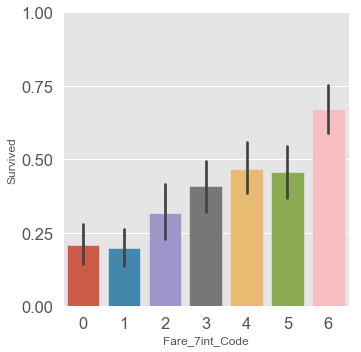

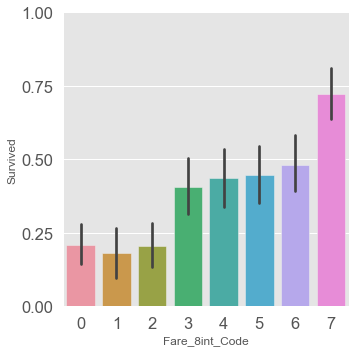

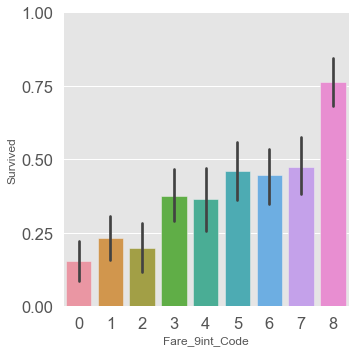

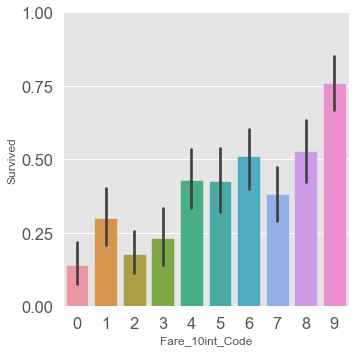

In [19]:
# Making fare intervals(1~10 intervals)
for i in range(1,11):
    df_data['Fare_'+str(i)+'int'] = pd.qcut(df_data['Fare'], i)

label = LabelEncoder()
for i in range(1,11):
    # Do labelencode on fare intervals
    df_data['Fare_'+str(i)+'int_Code'] = label.fit_transform(df_data['Fare_'+str(i)+'int'])
    
    # Show the relationship between fare intervals and cabin class
    display(pd.crosstab(df_data['Fare_'+str(i)+'int_Code'], df_data['Pclass']))
    
    # Plotting
    sns.factorplot(x='Fare_'+str(i)+'int_Code', y="Survived", data=df_data, kind='bar')
    plt.yticks(np.arange(0, 1.25, step=0.25))

In [20]:
# Check cols.
df_data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Sex_Code', 'Fare_1int',
       'Fare_2int', 'Fare_3int', 'Fare_4int', 'Fare_5int', 'Fare_6int',
       'Fare_7int', 'Fare_8int', 'Fare_9int', 'Fare_10int', 'Fare_1int_Code',
       'Fare_2int_Code', 'Fare_3int_Code', 'Fare_4int_Code', 'Fare_5int_Code',
       'Fare_6int_Code', 'Fare_7int_Code', 'Fare_8int_Code', 'Fare_9int_Code',
       'Fare_10int_Code'],
      dtype='object')

**<font color=black size=3>The contribution of variable Fare with n intervals(X) on Survived(Y)</font>**
+ Choose 5,6,8,9,10 intervals for further testing

In [21]:
# Data slicing
df_train = df_data[:len(df_train)]
df_test = df_data[len(df_train):]

runs = range(0,10)
print('Average Out-Of-Bag(oob) score with '+str(len(runs))+' runs test')
# Training features selection
for i in range(1,11):
    X = df_train['Fare_'+str(i)+'int_Code'].to_frame()  # transform series into dataframe
    Y = df_train['Survived']

    # Model training
    oob_score = 0
    for j in runs:
        model_test = RandomForestClassifier(random_state=j, n_estimators=250, min_samples_split=20, oob_score=True)
        model_test.fit(X, Y)
        oob_score += model_test.oob_score_
    print(str(i)+' intervals : %.5f' %(oob_score/len(runs)))

Average Out-Of-Bag(oob) score with 10 runs test
1 intervals : 0.61616
2 intervals : 0.63412
3 intervals : 0.65544
4 intervals : 0.66442
5 intervals : 0.67228
6 intervals : 0.67789
7 intervals : 0.66330
8 intervals : 0.66880
9 intervals : 0.67340
10 intervals : 0.66857


**<font color=black size=3>The contribution of variable Sex(X1), Pclass(X2), Fare with 5,6,8,9,10 intervals(X3) on Survived(Y)</font>**
+ Slicing into 5 intervals returns best oob and lb score

In [22]:
intervals = [5, 6, 8, 9, 10]
lb_score = [0.79425, 0.77033, 0.78947, 0.77990, 0.76555]
j = 0

# Training features selection
for i in intervals:
    X = df_train[['Sex_Code', 'Pclass', 'Fare_'+str(i)+'int_Code']]
    Y = df_train['Survived']

    # Model training
    model_3 = RandomForestClassifier(random_state=0, n_estimators=250, min_samples_split=20, oob_score=True)
    model_3.fit(X, Y)
    print('Out-Of-Bag(oob) score with '+str(i)+' intervals: %.5f' %(model_3.oob_score_), ', lb score : '+str(lb_score[j]))
    j += 1
    
# Export to csv
    # Training features selection
    X = df_test[['Sex_Code', 'Pclass', 'Fare_'+str(i)+'int_Code']]

    # Predict by model
    model_3_prediction = model_3.predict(X)
    submit3 = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': model_3_prediction.astype(int)})
    submit3.to_csv('Model_3_'+str(i)+'int.csv', index=False)

Out-Of-Bag(oob) score with 5 intervals: 0.81033 , lb score : 0.79425
Out-Of-Bag(oob) score with 6 intervals: 0.79237 , lb score : 0.77033
Out-Of-Bag(oob) score with 8 intervals: 0.81033 , lb score : 0.78947
Out-Of-Bag(oob) score with 9 intervals: 0.78788 , lb score : 0.7799
Out-Of-Bag(oob) score with 10 intervals: 0.80135 , lb score : 0.76555


**<font color=black size=3>Export to CSV</font>**

In [23]:
# Data processing
for i in range(1, 11):
    if i != 5:
        df_data = df_data.drop(['Fare_'+str(i)+'int', 'Fare_'+str(i)+'int_Code'], axis=1)  # delete useless features
df_data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Sex_Code', 'Fare_5int',
       'Fare_5int_Code'],
      dtype='object')

In [24]:
# Training features selection
X = df_test[['Sex_Code', 'Pclass', 'Fare_5int_Code']]

# Predict by model
model_3_prediction = model_3.predict(X)
submit3 = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': model_3_prediction.astype(int)})
submit3.to_csv('Model_3.csv', index=False)

**<font color=black size=3>4. Survival rate vs Ticket Connection</font>**  

**<font color=black size=3>Data analysis</font>**
+ Some people share same ticket, thus, there might be some relationship between these people

In [25]:
# Observe on Ticket parameter
df_train['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [26]:
# Data processing
df_data['Family_size'] = df_data['SibSp'] + df_data['Parch'] + 1  # define Family_size parameter

# Dataset observation
cols = ['Age', 'Name', 'Sex', 'Ticket', 'Pclass', 'Fare', 'Embarked', 'Family_size']
df_data.loc[:, cols]

,Age,Name,Sex,Ticket,Pclass,Fare,Embarked,Family_size
0,22.0,"Braund, Mr. Owen Harris",male,A/5 21171,3,7.2500,S,2
1,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,1,71.2833,C,2
2,26.0,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,3,7.9250,S,1
3,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,1,53.1000,S,2
4,35.0,"Allen, Mr. William Henry",male,373450,3,8.0500,S,1
5,NaN,"Moran, Mr. James",male,330877,3,8.4583,Q,1
6,54.0,"McCarthy, Mr. Timothy J",male,17463,1,51.8625,S,1
7,2.0,"Palsson, Master. Gosta Leonard",male,349909,3,21.0750,S,5
8,27.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,347742,3,11.1333,S,3
9,14.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,237736,2,30.0708,C,2


In [27]:
df_duplicate_ticket = pd.DataFrame()

for gruop_key, df_group_data in df_data.groupby('Ticket'):
    # Find people have same tickets
    if (len(df_group_data) > 1):  # record tickets which have shown at least twice
        df_duplicate_ticket = df_duplicate_ticket.append(df_group_data)

# Dataset observation
cols = ['Age', 'Name', 'Sex', 'Ticket', 'Pclass', 'Fare', 'Embarked', 'Family_size']
df_duplicate_ticket.loc[:, cols]

,Age,Name,Sex,Ticket,Pclass,Fare,Embarked,Family_size
257,30.00,"Cherry, Miss. Gladys",female,110152,1,86.5000,S,1
504,16.00,"Maioni, Miss. Roberta",female,110152,1,86.5000,S,1
759,33.00,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,110152,1,86.5000,S,1
262,52.00,"Taussig, Mr. Emil",male,110413,1,79.6500,S,3
558,39.00,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,110413,1,79.6500,S,3
585,18.00,"Taussig, Miss. Ruth",female,110413,1,79.6500,S,3
110,47.00,"Porter, Mr. Walter Chamberlain",male,110465,1,52.0000,S,1
475,NaN,"Clifford, Mr. George Quincy",male,110465,1,52.0000,S,1
366,60.00,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,110813,1,75.2500,C,2
1127,64.00,"Warren, Mr. Frank Manley",male,110813,1,75.2500,C,2


In [28]:
df_data['Connected_Survival'] = 0.5 # default

for gruop_key, df_group_data in df_data.groupby('Ticket'):
    if (len(df_group_data) > 1):  # record tickets which have shown at least twice
        for ind, row in df_group_data.iterrows():
            alst_1_surv_in_group = df_group_data.drop(ind)['Survived'].max()  # check if there are at least 1 surviver in a group
            passID = row['PassengerId']
            if (alst_1_surv_in_group == 1.0):  # if there are at least 1 surviver in a group, then set Connected_Survival as 1
                df_data.loc[df_data['PassengerId'] == passID, 'Connected_Survival'] = 1
            elif (alst_1_surv_in_group == 0.0):  # if not, set Connected_Survival as 0
                df_data.loc[df_data['PassengerId'] == passID, 'Connected_Survival'] = 0

# Dataset observation
cols = ['Age', 'Name', 'Sex', 'Ticket', 'Pclass', 'Fare', 'Embarked', 'Family_size', 'Connected_Survival']
df_data.loc[:, cols].head(10)

,Age,Name,Sex,Ticket,Pclass,Fare,Embarked,Family_size,Connected_Survival
0,22.0,"Braund, Mr. Owen Harris",male,A/5 21171,3,7.2500,S,2,0.5
1,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,1,71.2833,C,2,0.5
2,26.0,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,3,7.9250,S,1,0.5
3,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,1,53.1000,S,2,0.0
4,35.0,"Allen, Mr. William Henry",male,373450,3,8.0500,S,1,0.5
5,NaN,"Moran, Mr. James",male,330877,3,8.4583,Q,1,0.5
6,54.0,"McCarthy, Mr. Timothy J",male,17463,1,51.8625,S,1,0.5
7,2.0,"Palsson, Master. Gosta Leonard",male,349909,3,21.0750,S,5,0.0
8,27.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,347742,3,11.1333,S,3,1.0
9,14.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,237736,2,30.0708,C,2,0.0


**<font color=black size=3>The contribution of variable Ticket Connection(X) on Survived(Y)</font>**

In [29]:
# Data slicing
df_train = df_data[:len(df_train)]
df_test = df_data[len(df_train):]

# Training features selection
X = df_train['Connected_Survival'].to_frame()  # transform series into dataframe
Y = df_train['Survived']

# Model training
model_test = RandomForestClassifier(random_state=0, n_estimators=250, min_samples_split=20, oob_score=True)
model_test.fit(X, Y)
print('Out-Of-Bag(oob) score : %.5f' %(model_test.oob_score_))

Out-Of-Bag(oob) score : 0.71942


**<font color=black size=3>The contribution of variable Sex(X1), Pclass(X2), Fare with 5 intervals(X3), Ticket Connection(X4) on Survived(Y)</font>**

In [30]:
# Training features selection
X = df_train[['Sex_Code', 'Pclass', 'Fare_5int_Code', 'Connected_Survival']]
Y = df_train['Survived']

# Model training
model_4 = RandomForestClassifier(random_state=0, n_estimators=250, min_samples_split=20, oob_score=True)
model_4.fit(X, Y)
print('Out-Of-Bag(oob) score : %.5f' %(model_4.oob_score_))

Out-Of-Bag(oob) score : 0.82155


**<font color=black size=3>Export to CSV</font>**

In [31]:
# Training features selection
X = df_test[['Sex_Code', 'Pclass', 'Fare_5int_Code', 'Connected_Survival']]

# Predict by model
model_4_prediction = model_4.predict(X)
submit4 = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': model_4_prediction.astype(int)})
submit4.to_csv('Model_4.csv', index=False)

**<font color=black size=3>5. Survival rate vs Age</font>**  

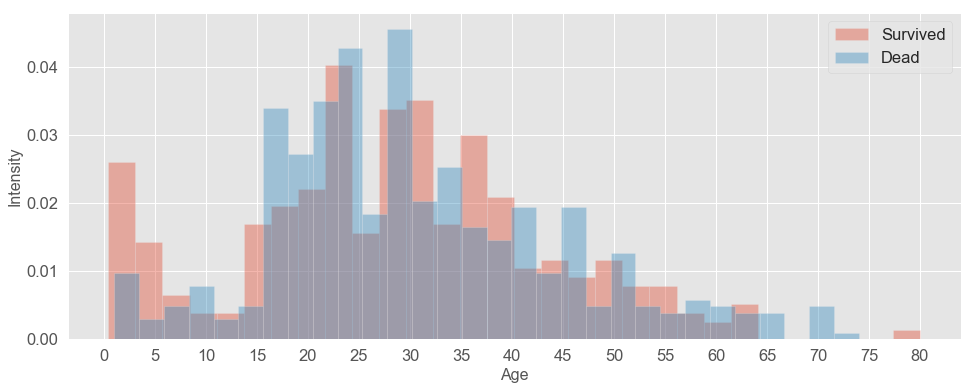

In [32]:
# Plotting
plt.figure(figsize = (16,6))  # enlarge figure size
s = sns.distplot(df_data.loc[df_data.Survived == 1]['Age'].dropna(), kde=False, bins=30, norm_hist=True, label='Survived')
s = sns.distplot(df_data.loc[df_data.Survived == 0]['Age'].dropna(), kde=False, bins=30, norm_hist=True, label='Dead')
s.set_xlabel('Age',fontsize=16)
s.set_ylabel('Intensity',fontsize=16)
s.set_xticks(range(0, 85, 5))
s.legend()

In [33]:
# Extract name titles
df_data['Name_Title'] = df_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)  # Extract name by regular expression
display(df_data['Name_Title'].unique())

# Observe the relation between name titles and other parameters
display(df_data.groupby('Name_Title')['Age'].median())
display(pd.crosstab(df_data['Name_Title'], df_data['Sex']).T.style.background_gradient(cmap='summer_r'))
display(pd.crosstab(df_data['Name_Title'], df_data['Survived']).T.style.background_gradient(cmap='summer_r'))

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

Name_Title
Capt        70.0
Col         54.5
Countess    33.0
Don         40.0
Dona        39.0
Dr          49.0
Jonkheer    38.0
Lady        48.0
Major       48.5
Master       4.0
Miss        22.0
Mlle        24.0
Mme         24.0
Mr          29.0
Mrs         35.5
Ms          28.0
Rev         41.5
Sir         49.0
Name: Age, dtype: float64

Name_Title,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


Name_Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,0,1,4,1,0,1,17,55,0,0,436,26,0,6,0
1.0,0,1,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1


In [34]:
# Merge name titles
df_data['Name_Title'] = df_data['Name_Title'].replace(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Major',
                                                     'Rev', 'Sir'], 'Elderly_male')
df_data['Name_Title'] = df_data['Name_Title'].replace(['Countess', 'Dona', 'Lady'], 'Mrs')
df_data['Name_Title'] = df_data['Name_Title'].replace(['Mlle', 'Ms','Mme'],'Miss')
display(df_data['Name_Title'].unique())

# Observe the relation between name titles and other parameters
display(df_data.groupby('Name_Title')['Age'].median())
display(pd.crosstab(df_data['Name_Title'], df_data['Sex']).T.style.background_gradient(cmap='summer_r'))
display(pd.crosstab(df_data['Name_Title'], df_data['Survived']).T.style.background_gradient(cmap='summer_r'))

# Dataset observation
cols = ['Age', 'Name', 'Sex', 'Name_Title']
df_data.loc[:, cols]

array(['Mr', 'Mrs', 'Miss', 'Master', 'Elderly_male'], dtype=object)

Name_Title
Elderly_male    49.0
Master           4.0
Miss            22.0
Mr              29.0
Mrs             36.0
Name: Age, dtype: float64

Name_Title,Elderly_male,Master,Miss,Mr,Mrs
Sex,,,,,
female,1,0,265,0,200
male,25,61,0,757,0


Name_Title,Elderly_male,Master,Miss,Mr,Mrs
Survived,,,,,
0.0,15,17,55,436,26
1.0,6,23,131,81,101


,Age,Name,Sex,Name_Title
0,22.0,"Braund, Mr. Owen Harris",male,Mr
1,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Mrs
2,26.0,"Heikkinen, Miss. Laina",female,Miss
3,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Mrs
4,35.0,"Allen, Mr. William Henry",male,Mr
5,NaN,"Moran, Mr. James",male,Mr
6,54.0,"McCarthy, Mr. Timothy J",male,Mr
7,2.0,"Palsson, Master. Gosta Leonard",male,Master
8,27.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,Mrs
9,14.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,Mrs


In [35]:
# Make dictionary
Pred_Age_by_NameTitle = df_data.groupby('Name_Title')['Age'].median().values
Name_Title = df_data.groupby('Name_Title')['Age'].groups.keys()
dic = dict(zip(Name_Title, Pred_Age_by_NameTitle))
display(dic)

# Fill missing age
df_data['Pred_Age_by_NameTitle'] = df_data['Age']
df_data['Pred_Age_by_NameTitle'] = df_data['Pred_Age_by_NameTitle'].fillna(df_data['Name_Title'].apply(lambda x: dic.get(x)))
df_data['Pred_Age_by_NameTitle'] = df_data['Pred_Age_by_NameTitle'].astype('int')

# Dataset observation
df_data.info()
cols = ['Age', 'Name', 'Sex', 'Name_Title', 'Pred_Age_by_NameTitle']
df_data.loc[:, cols]

{'Elderly_male': 49.0, 'Master': 4.0, 'Miss': 22.0, 'Mr': 29.0, 'Mrs': 36.0}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 19 columns):
Age                      1046 non-null float64
Cabin                    295 non-null object
Embarked                 1307 non-null object
Fare                     1309 non-null float64
Name                     1309 non-null object
Parch                    1309 non-null int64
PassengerId              1309 non-null int64
Pclass                   1309 non-null int64
Sex                      1309 non-null object
SibSp                    1309 non-null int64
Survived                 891 non-null float64
Ticket                   1309 non-null object
Sex_Code                 1309 non-null int64
Fare_5int                1309 non-null category
Fare_5int_Code           1309 non-null int32
Family_size              1309 non-null int64
Connected_Survival       1309 non-null float64
Name_Title               1309 non-null object
Pred_Age_by_NameTitle    1309 non-null int32
dtypes: category(1), fl

,Age,Name,Sex,Name_Title,Pred_Age_by_NameTitle
0,22.0,"Braund, Mr. Owen Harris",male,Mr,22
1,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Mrs,38
2,26.0,"Heikkinen, Miss. Laina",female,Miss,26
3,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Mrs,35
4,35.0,"Allen, Mr. William Henry",male,Mr,35
5,NaN,"Moran, Mr. James",male,Mr,29
6,54.0,"McCarthy, Mr. Timothy J",male,Mr,54
7,2.0,"Palsson, Master. Gosta Leonard",male,Master,2
8,27.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,Mrs,27
9,14.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,Mrs,14


In [36]:
df_data['Kid'] = ((df_data['Pred_Age_by_NameTitle']) < 16.0) * 1

# Dataset observation
cols =  ['Age', 'Name', 'Sex', 'Name_Title', 'Pred_Age_by_NameTitle', 'Kid']
df_data.loc[:, cols].head(10)

,Age,Name,Sex,Name_Title,Pred_Age_by_NameTitle,Kid
0,22.0,"Braund, Mr. Owen Harris",male,Mr,22,0
1,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Mrs,38,0
2,26.0,"Heikkinen, Miss. Laina",female,Miss,26,0
3,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Mrs,35,0
4,35.0,"Allen, Mr. William Henry",male,Mr,35,0
5,NaN,"Moran, Mr. James",male,Mr,29,0
6,54.0,"McCarthy, Mr. Timothy J",male,Mr,54,0
7,2.0,"Palsson, Master. Gosta Leonard",male,Master,2,1
8,27.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,Mrs,27,0
9,14.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,Mrs,14,1


**<font color=black size=3>The contribution of variable Age(X) on Survived(Y)</font>**

In [37]:
# Data slicing
df_train = df_data[:len(df_train)]
df_test = df_data[len(df_train):]

# Training features selection
X = df_train['Kid'].to_frame()  # transform series into dataframe
Y = df_train['Survived']

# Model training
model_test = RandomForestClassifier(random_state=0, n_estimators=250, min_samples_split=20, oob_score=True)
model_test.fit(X, Y)
print('Out-Of-Bag(oob) score : %.5f' %(model_test.oob_score_))

Out-Of-Bag(oob) score : 0.63300


**<font color=black size=3>The contribution of variable Sex(X1), Pclass(X2), Fare with 5 intervals(X3), Ticket Connection(X4), Age(X5) on Survived(Y)</font>**

In [38]:
# Training features selection
X = df_train[['Sex_Code', 'Pclass', 'Fare_5int_Code', 'Connected_Survival', 'Kid']]
Y = df_train['Survived']

# Model training
model_5 = RandomForestClassifier(random_state=0, n_estimators=250, min_samples_split=20, oob_score=True)
model_5.fit(X, Y)
print('Out-Of-Bag(oob) score : %.5f' %(model_5.oob_score_))

Out-Of-Bag(oob) score : 0.84063


**<font color=black size=3>Export to CSV</font>**

In [39]:
# Training features selection
X = df_test[['Sex_Code', 'Pclass', 'Fare_5int_Code', 'Connected_Survival', 'Kid']]

# Predict by model
model_5_prediction = model_5.predict(X)
submit5 = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': model_5_prediction.astype(int)})
submit5.to_csv('Model_5.csv', index=False)

**<font color=black size=4>Xgboost</font>**

In [40]:
# Training features selection
X = df_train[['Sex_Code', 'Pclass', 'Fare_5int_Code', 'Connected_Survival', 'Kid']]
Y = df_train['Survived']

# Note that XGBoost will make some troubles if the input is not numpy arrary
from xgboost import XGBClassifier

# Model training
xgb = XGBClassifier()
xgb.fit(X, Y)

# Calculate accuracy of prediction
xgb.score(X, Y)

0.8552188552188552

In [41]:
# Training features selection
X = df_test[['Sex_Code', 'Pclass', 'Fare_5int_Code', 'Connected_Survival', 'Kid']]

# Predict by model
xgb_prediction = xgb.predict(X)
submitxgb = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': xgb_prediction.astype(int)})
submitxgb.to_csv('Model_xgb.csv', index=False)

**<font color=black size=4>Hyper-Parameters Searching (Useless)</font>**

In [42]:
# # Training features selection
# X = df_train[['Sex_Code', 'Pclass', 'Fare_5int_Code', 'Connected_Survival', 'Kid']]
# Y = df_train['Survived']

# # Turning Hyper-Parameters
# rf = RandomForestClassifier(oob_score=True, random_state=0, n_jobs=-1)
# tuned_parameters = {'criterion' : ['entropy'],
#                     'min_samples_leaf' : [1, 5, 10],
#                     'min_samples_split' : [20, 50, 100],
#                     'n_estimators': [250, 800, 1000]}
# gs = GridSearchCV(estimator=rf, param_grid=tuned_parameters, scoring='accuracy', cv=3, n_jobs=-1)
# gs = gs.fit(X, Y)

# print(gs.best_score_)
# print(gs.best_params_)

In [43]:
# # Model training
# model_Final = RandomForestClassifier(random_state=0, 
#                                      criterion=gs.best_params_['criterion'],
#                                      n_estimators=gs.best_params_['n_estimators'],
#                                      min_samples_split=gs.best_params_['min_samples_split'],
#                                      min_samples_leaf=gs.best_params_['min_samples_leaf'],
#                                      oob_score=True)
# model_Final.fit(X, Y)
# print('Out-Of-Bag(oob) score : %.5f' %(model_Final.oob_score_))

**<font color=black size=3>Export to CSV</font>**

In [44]:
# # Training features selection
# X = df_test[['Sex_Code', 'Pclass', 'Fare_5int_Code', 'Connected_Survival', 'Kid']]

# # Predict by model
# model_Final_prediction = model_Final.predict(X)
# submitFinal = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': model_Final_prediction.astype(int)})
# submitFinal.to_csv('Model_Final.csv', index=False)